In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
juego= pd.read_csv('juego_funciones.csv') #Abro el csv de los juegos

In [4]:
item= pd.read_csv('item_funciones.csv') #Abro el csv de los items

In [5]:
review= pd.read_csv('review_funciones.csv') #Abro el csv de las reseñas

Revision de la tabla juego

In [4]:
juego.shape #Veo las dimensiones

(74837, 6)

In [5]:
juego.describe() #Veo los valores numericos

,id
count,7.483700e+04
mean,4.662320e+05
std,1.731861e+05
min,0.000000e+00
25%,3.441220e+05
50%,4.626600e+05
75%,6.020700e+05
max,2.028850e+06


In [6]:
for c in juego.columns:
    print(c,juego[c].isna().sum()) #Veo los valores nulos

publisher 15641
genres 3283
app_name 3
title 2051
release_date 2899
id 0


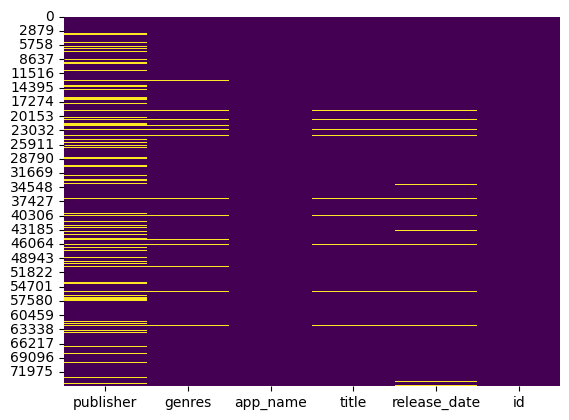

In [7]:
#Mapa de calor de registros nulos de la tabla juego
sns.heatmap(juego.isnull(), cbar=False, cmap='viridis')
plt.show()

In [8]:
for c in juego.columns: #Veo valores unicos de la tabla juego
    print(juego[c].unique())

['Kotoshiro' 'Making Fun, Inc.' 'Poolians.com' ... 'OrtiGames/OrtiSoft'
 'INGAME' 'Bidoniera Games']
['Action' 'Casual' 'Indie' 'Simulation' 'Strategy' 'Free to Play' 'RPG'
 'Sports' 'Adventure' nan 'Racing' 'Early Access' 'Massively Multiplayer'
 'Animation &amp; Modeling' 'Video Production' 'Utilities'
 'Web Publishing' 'Education' 'Software Training'
 'Design &amp; Illustration' 'Audio Production' 'Photo Editing'
 'Accounting']
['Lost Summoner Kitty' 'Ironbound' 'Real Pool 3D - Poolians' ...
 'Russian Roads' 'EXIT 2 - Directions' 'Maze Run VR']
['Lost Summoner Kitty' 'Ironbound' 'Real Pool 3D - Poolians' ...
 'LOGistICAL: South Africa' 'Russian Roads' 'EXIT 2 - Directions']
['2018-01-04' '2017-07-24' '2017-12-07' ... '2004-03-01' '2016-11-19'
 '2018-10-01']
[761140 643980 670290 ... 610660 658870 681550]


Revision de la tabla review

In [11]:
review.shape #Veo las dimensiones

(59275, 8)

In [12]:
review.describe() #Veo sus valores numericos

,item_id
count,59275.000000
mean,169963.249296
std,132027.019131
min,10.000000
25%,8930.000000
50%,218230.000000
75%,261760.000000
max,527340.000000


In [13]:
for c in review.columns: #Veo sus valores nulos
    print(c,review[c].isna().sum())

funny 51125
posted 0
last_edited 53135
item_id 0
helpful 0
recommend 0
review 0
User 0


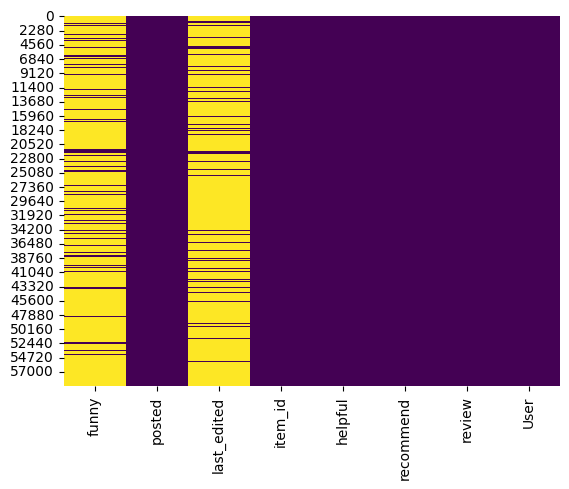

In [14]:
#La tabla review en funny y Last edited edited presentan muchos valores nulos asi que son columnas que no me van a servir ademas no es informacion relevante asi que voy a borrarlas luego para mi modelo de recomendacion
sns.heatmap(review.isnull(), cbar=False, cmap='viridis')
plt.show()

In [15]:
for c in juego.columns: #Veo valores unicos
    print(juego[c].unique())

["['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']"
 "['Free to Play', 'Indie', 'RPG', 'Strategy']"
 "['Casual', 'Free to Play', 'Indie', 'Simulation', 'Sports']"
 "['Action', 'Adventure', 'Casual']" nan
 "['Action', 'Adventure', 'Simulation']"
 "['Free to Play', 'Indie', 'Simulation', 'Sports']"
 "['Casual', 'Indie', 'Racing', 'Simulation']"
 "['Action', 'Indie', 'Simulation', 'Early Access']"
 "['Action', 'Adventure', 'Casual', 'Indie', 'RPG']" "['Casual', 'Indie']"
 "['Casual', 'Indie', 'Simulation']"
 "['Adventure', 'Casual', 'Indie', 'Simulation', 'Strategy']"
 "['Action', 'Adventure', 'Indie']" "['Racing', 'Simulation', 'Sports']"
 "['Action', 'Indie']" "['Action', 'Indie', 'Racing']" "['Action']"
 "['Action', 'Indie', 'RPG']" "['Casual', 'Indie', 'Strategy']"
 "['Action', 'Casual', 'Indie', 'Massively Multiplayer', 'Simulation', 'Sports', 'Strategy']"
 "['Adventure', 'Casual', 'Indie']" "['Action', 'Adventure', 'RPG']"
 "['Adventure', 'Casual', 'Indie', 'RPG']" "['Strateg

Revision de la tabla item

In [16]:
#Analizamos un vistazo rapido de los valores numericos, aca podemos ver que hay alguien que jugo 19967 horas en 2 semanas, 2 semanas tienen 336 horas asi que este outlier debe ser por una falla en el conteo

item.describe()

,steam_id,item_id,playtime_forever,playtime_2weeks
count,1.285610e+06,1.285610e+06,1.285610e+06,1.285610e+06
mean,7.656120e+16,1.780762e+05,9.944285e+02,9.019018e+00
std,3.890242e+07,1.315549e+05,5.431507e+03,1.377624e+02
min,7.656120e+16,1.000000e+01,0.000000e+00,0.000000e+00
25%,7.656120e+16,3.446000e+04,0.000000e+00,0.000000e+00
50%,7.656120e+16,2.143400e+05,3.300000e+01,0.000000e+00
75%,7.656120e+16,2.659300e+05,3.540000e+02,0.000000e+00
max,7.656120e+16,5.286600e+05,6.427730e+05,1.996700e+04


In [17]:
mask = item['playtime_2weeks'] == 19967
registros_filtrados = item[mask]
registros_filtrados

,user_id,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
35445,123repulseMe,76561198053851725,275850,No Man's Sky,30809,19967


In [18]:
for c in item.columns: #Reviso valores nulos
    print(c,item[c].isna().sum())

user_id 0
steam_id 0
item_id 0
item_name 0
playtime_forever 0
playtime_2weeks 0


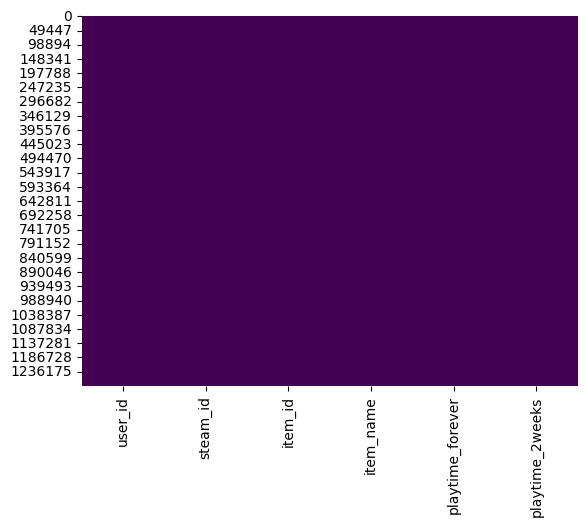

In [53]:
#La tabla items no presenta valores nulos
sns.heatmap(item.isnull(), cbar=False, cmap='viridis')
plt.show()

Comenzamos a hacer revisiones mas detalladas

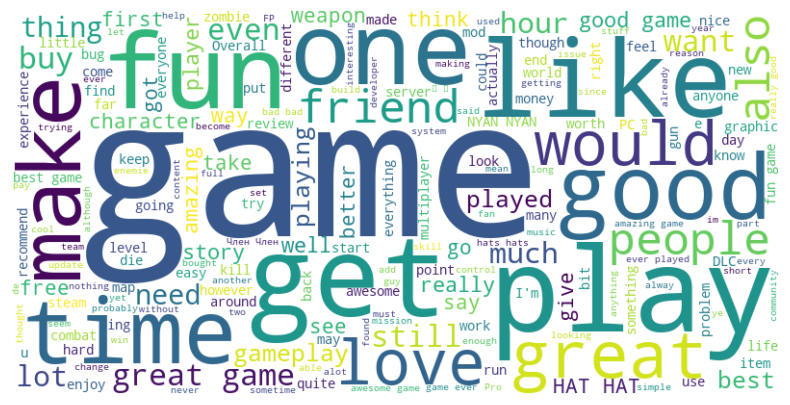

In [20]:
#Mostramos las palabras mas utilizadas en las reseñas que son game, play, fun, like, play, get, one. Hay mas palabras muy utilizadas pero esas son las principales
text = ' '.join(review['review'])
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=200).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

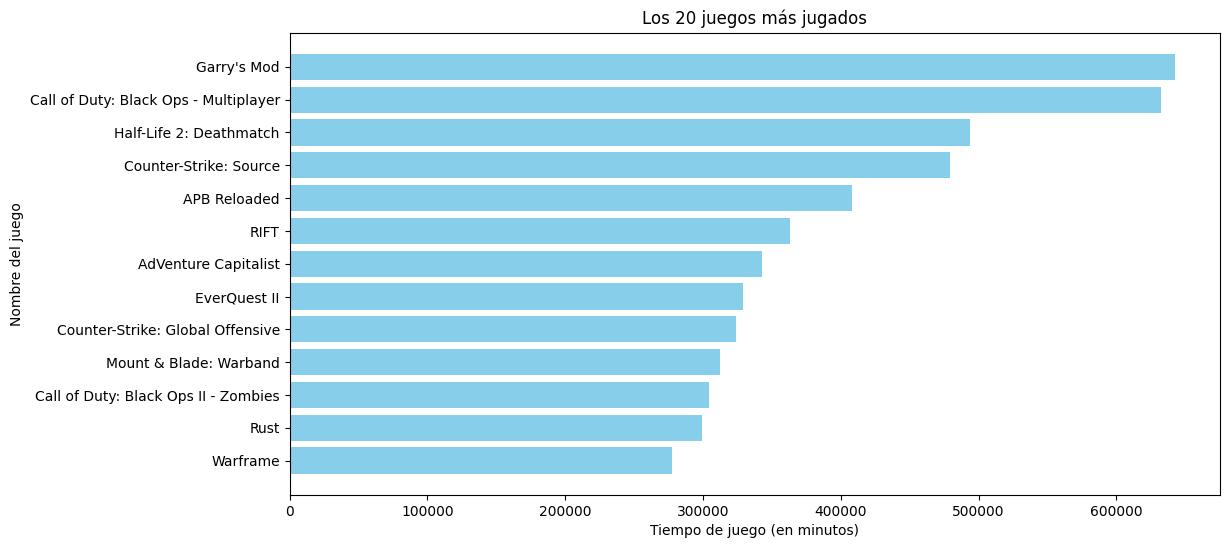

In [19]:
# Ordena el DataFrame por la columna 'playtime_forever' en orden descendente
top_20_juegos = item.sort_values(by='playtime_forever', ascending=False).head(20)

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_20_juegos['item_name'], top_20_juegos['playtime_forever'], color='skyblue')
plt.xlabel('Tiempo de juego (en minutos)')
plt.ylabel('Nombre del juego')
plt.title('Los 20 juegos más jugados')
plt.gca().invert_yaxis() 
plt.show()

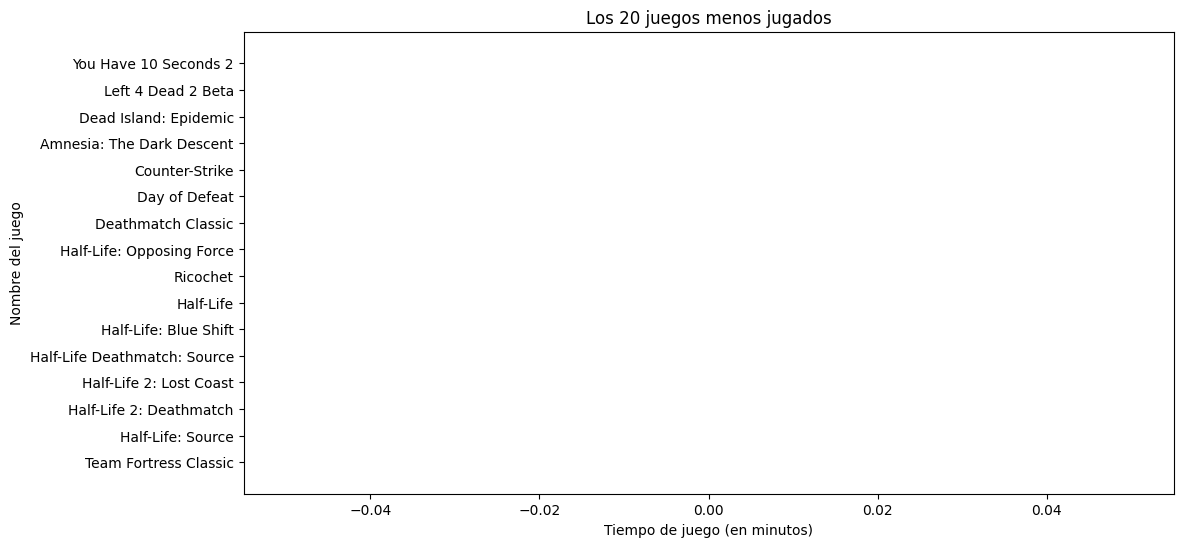

In [21]:
#Me sale que hay juegos sin tiempo de juego, al eliminar registros de la tabla item para un mejor procesamiento muchos juegos se quedaron sin tiempo de juego
bottom_20_juegos = item.sort_values(by='playtime_forever').head(20)
plt.figure(figsize=(12, 6))
plt.barh(bottom_20_juegos['item_name'], bottom_20_juegos['playtime_forever'], color='salmon')
plt.xlabel('Tiempo de juego (en minutos)')
plt.ylabel('Nombre del juego')
plt.title('Los 20 juegos menos jugados')
plt.gca().invert_yaxis()  
plt.show()


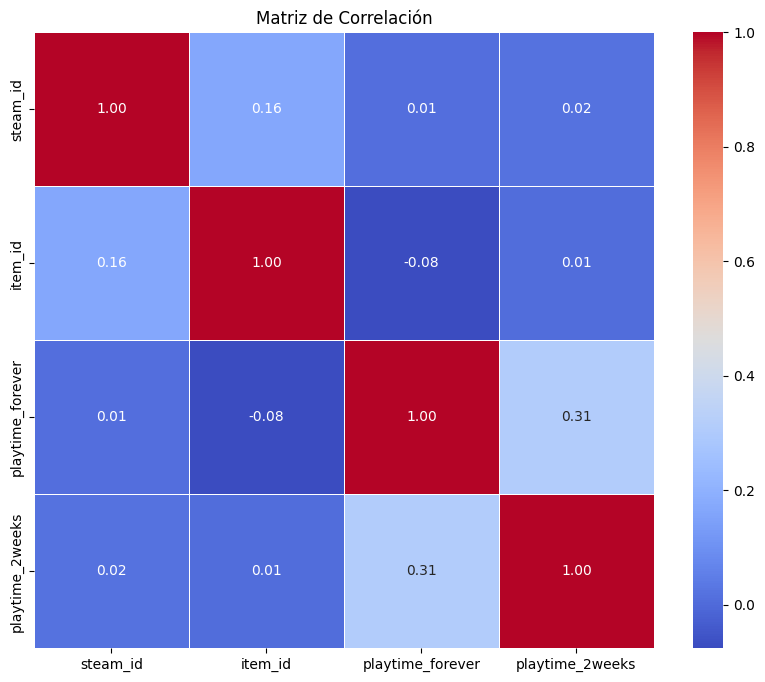

In [24]:
#Hacemos una matriz de correlacion en la tabla item para ver si existe correlacion entre juegos y tiempo jugado y no existe, la correlacion mas fuerte es la de tiempo jugado total y en las ultimas 2 semanas
correlation_matrix = item[['steam_id', 'item_id', 'playtime_forever', 'playtime_2weeks']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()